#### Installing and loading `yfinance` module to load Yahoo Finance data directly to Python

In [1]:
!pip install yfinance==0.1.67
import yfinance as yf

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=f88b8b351785d2be4d83410e22c338309ed886fc5c1343903dff1bd5b3034cda
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/f2/b5/2c/59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking


#### Installing `bs4`, `html5lib` and  `lxml` and importing `BeautifulSoup` module from `bs4` to webscrape financial data from Yahoo Finance. 

In [4]:
!mamba install bs4==4.10.0
!mamba install html5lib==1.1
!pip install lxml==4.6.4

from bs4 import BeautifulSoup

/usr/bin/sh: mamba: command not found
/usr/bin/sh: mamba: command not found


#### Importing `requests` module to make html requests through Python and `pandas` module to work with data frames in Python

In [ ]:
import pandas as pd
import requests

## Question 1: Use `yfinance` to Extract `Tesla` Stock Data

In [3]:
tesla = yf.Ticker('TSLA') #Tesla's ticker in the stock market is 'TSLA'.
tesla_data = tesla.history(period="max") #Extracting all Tesla stock values ever since they entered the stock market.
tesla_data.reset_index(inplace=True) #Resetting the data frame indexes.
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


## Question 2: Use Webscraping to Extract `Tesla` Revenue Data

In [19]:
u_agent = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36 AVG/100.0.15871.129'}
tesla_url = 'https://finance.yahoo.com/quote/TSLA/financials'
tesla_html = requests.get(tesla_url, headers = u_agent).text
tesla_soup = BeautifulSoup(tesla_html, 'html5lib')

tesla_features = tesla_soup.find_all('span',{'class':'Va(m)'})
tesla_values = tesla_soup.find_all('div',{'class':'D(tbc)'})
tesla_periods = ['TTM','31/12/2021','31/12/2020','31/12/2019','31/12/2018']


tesla_statements = [tesla_features[i].text for i in range(5,len(tesla_features))]
tesla_numbers = [tesla_values[j].text for j in range(2,len(tesla_values))] 
# in this tesla_numbers list, we can also obtain the features in every 6th element. So here we have a second way of obtaining the features.

tesla_financials = pd.DataFrame(index=tesla_statements,columns=tesla_periods)

for i in range(0,len(tesla_financials)):
    tesla_financials.iloc[i,] = tesla_numbers[1:6]
    del(tesla_numbers[0:6])
    
tesla_financials.tail()

,TTM,31/12/2021,31/12/2020,31/12/2019,31/12/2018
Total Unusual Items Excluding Goodwill,"-74,000","27,000",0,"-149,000","-135,233"
Total Unusual Items,"-74,000","27,000",0,"-149,000","-135,233"
Normalized EBITDA,"13,013,000","9,598,000","4,224,000","2,323,000","1,694,609"
Tax Rate for Calcs,0,0,0,0,0
Tax Effect of Unusual Items,"-7,654","2,970",0,"-25,330","-36,513"


## Question 3: Use `yfinance` to Extract `GME` Stock Data

In [6]:
gme = yf.Ticker('gme') #GameStop's ticker in the stock market is 'gme'.
gme_data = gme.history(period="max") #Extracting all GameStop stock values ever since they entered the stock market.
gme_data.reset_index(inplace=True) #Resetting the data frame indexes.
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766665,19054000,0.0,0.0
1,2002-02-14,6.850830,6.864296,6.682505,6.733003,2755400,0.0,0.0
2,2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
3,2002-02-19,6.665673,6.665673,6.312191,6.430018,1852600,0.0,0.0
4,2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


## Question 4: Use Webscraping to Extract `GME` Revenue Data

In [ ]:
u_agent = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36'}
gme_url = 'https://finance.yahoo.com/quote/GME/financials'
gme_html = requests.get(gme_url, headers = u_agent).text
gme_soup = BeautifulSoup(gme_html, 'html5lib')

gme_features = gme_soup.find_all('span',{'class':'Va(m)'})
gme_values = gme_soup.find_all('div',{'class':'D(tbc)'})
gme_periods = ['TTM','31/12/2021','31/12/2020','31/12/2019','31/12/2018']


gme_statements = [gme_features[i].text for i in range(5,len(gme_features))]
gme_numbers = [gme_values[j].text for j in range(2,len(gme_values))] 
# in this gme_numbers list, we can also obtain the features in every 6th element. So here we have a second way of obtaining the features.

gme_financials = pd.DataFrame(index=gme_statements,columns=gme_periods)

for i in range(0,len(gme_financials)):
    gme_financials.iloc[i,] = gme_numbers[1:6]
    del(gme_numbers[0:6])
    
gme_financials.tail()

## Defining the `make_graph` function, using the `matplotlib.pyplot` module

In [1]:
import matplotlib.pyplot as plt

def make_graph(x,y, xlabel= None, ylabel= None, title= None):
    fig,ax = plt.subplots()
    lines = ax.plot(x, y, color='blue')
    plt.fill_between(x, y, step="pre", color= 'blue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

## Question 5: Plot Tesla Stock Graph

#### This step works on the assumption that the code for will use the code for Question 2 has already been entered. It uses the `make_graph` function defined above.

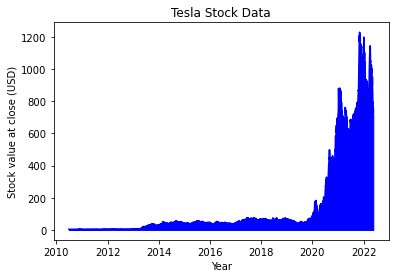

In [5]:
make_graph(tesla_data['Date'],tesla_data['Close'],title='Tesla Stock Data',xlabel='Year',ylabel='Stock value at close (USD)')

## Question 6: Plot GameStop Stock Graph

#### This step works on the assumption that the code for will use the code for Question 3 has already been entered. It uses the `make_graph` function defined above.

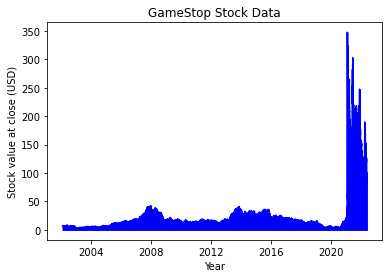

In [7]:
make_graph(gme_data['Date'],gme_data['Close'],title='GameStop Stock Data',xlabel='Year',ylabel='Stock value at close (USD)')